# Single Well Assay with 0.5 uM dialyzed p38, Abl WT, Abl GK, Src WT, and Src GK in non-binding plate; Das, Imat, Pon, Stauro; 4 WVs and multiple gains depending on ligand

## Plot single wv data

In [1]:
# %load single wavelength data


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


import assaytools


from assaytools import platereader


filenames = ['p38_Abl_WT_GK_Src_WT_GK_conc_0_20190410_133519.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_1_20190410_134751.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_2_20190410_135902.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_3_20190410_141013.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_4_20190410_142122.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_5_20190410_143235.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_6_20190410_144346.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_7_20190410_145456.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_8_20190410_150611.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_9_20190410_151725.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_10_20190410_152839.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_11_20190410_153954.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_12_20190410_155108.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_13_20190410_160222.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_14_20190410_161343.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_15_20190410_162500.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_16_20190410_163618.xml']

datapath = 'infinite_results'


concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])


reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)
    
plate_layout = pd.read_excel('20190307_plate_layout_for_binding_assay.xlsx', header=None)
plate_layout = plate_layout.loc[:, 0:1]
plate_layout.columns = ['well', 'name']
if len(list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')) > 0:
    list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')

# Ex 280/Em 420 nm

In [3]:
# need to associate reads with correct well
nrows = 6
ncols = 12
index = 0

label = 'ex280_em420_top_gain75'

data_420 = np.zeros([nrows, ncols, nreads], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements = [(reads[i][label][well]) for i in range(nreads)]
        for i in range(nreads):
            measurements = [x if x != 'OVER' else 70000 for x in measurements]
            measurements = [float(i) for i in measurements]
        data_420[row_index,col_index,:] = np.array(measurements)
        print(well)
        print(data_420[row_index,col_index,:])

A1
[2484. 2472. 2454. 2493. 2699. 2755. 2777. 2913. 2946. 3108. 3222. 3424.
 3387. 3287. 3312. 3284. 3305.]
A2
[2610. 2610. 2494. 2424. 2503. 2435. 2324. 2401. 2365. 2345. 2314. 2409.
 2300. 2399. 2455. 2697. 2889.]
A3
[2643. 2579. 2518. 2431. 2489. 2445. 2361. 2390. 2317. 2335. 2281. 2333.
 2300. 2427. 2429. 2626. 2932.]
A4
[2624. 2629. 2542. 2495. 2549. 2432. 2411. 2407. 2358. 2348. 2349. 2412.
 2340. 2420. 2445. 2673. 2901.]
A5
[2662. 2595. 2495. 2469. 2533. 2452. 2355. 2384. 2347. 2303. 2326. 2349.
 2275. 2326. 2407. 2578. 2816.]
A6
[2652. 2576. 2525. 2416. 2471. 2423. 2336. 2356. 2325. 2293. 2281. 2349.
 2309. 2346. 2408. 2574. 2811.]
A7
[2568. 2541. 2481. 2411. 2451. 2394. 2329. 2381. 2341. 2323. 2256. 2390.
 2269. 2327. 2358. 2586. 2763.]
A8
[2549. 2536. 2484. 2560. 2591. 2436. 2339. 2400. 2441. 2530. 2459. 2407.
 2265. 2461. 2405. 2564. 2885.]
A9
[2580. 2512. 2474. 2496. 2476. 2443. 2292. 2379. 2333. 2311. 2284. 2367.
 2306. 2380. 2425. 2559. 2784.]
A10
[2873. 2820. 2749. 2727.

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

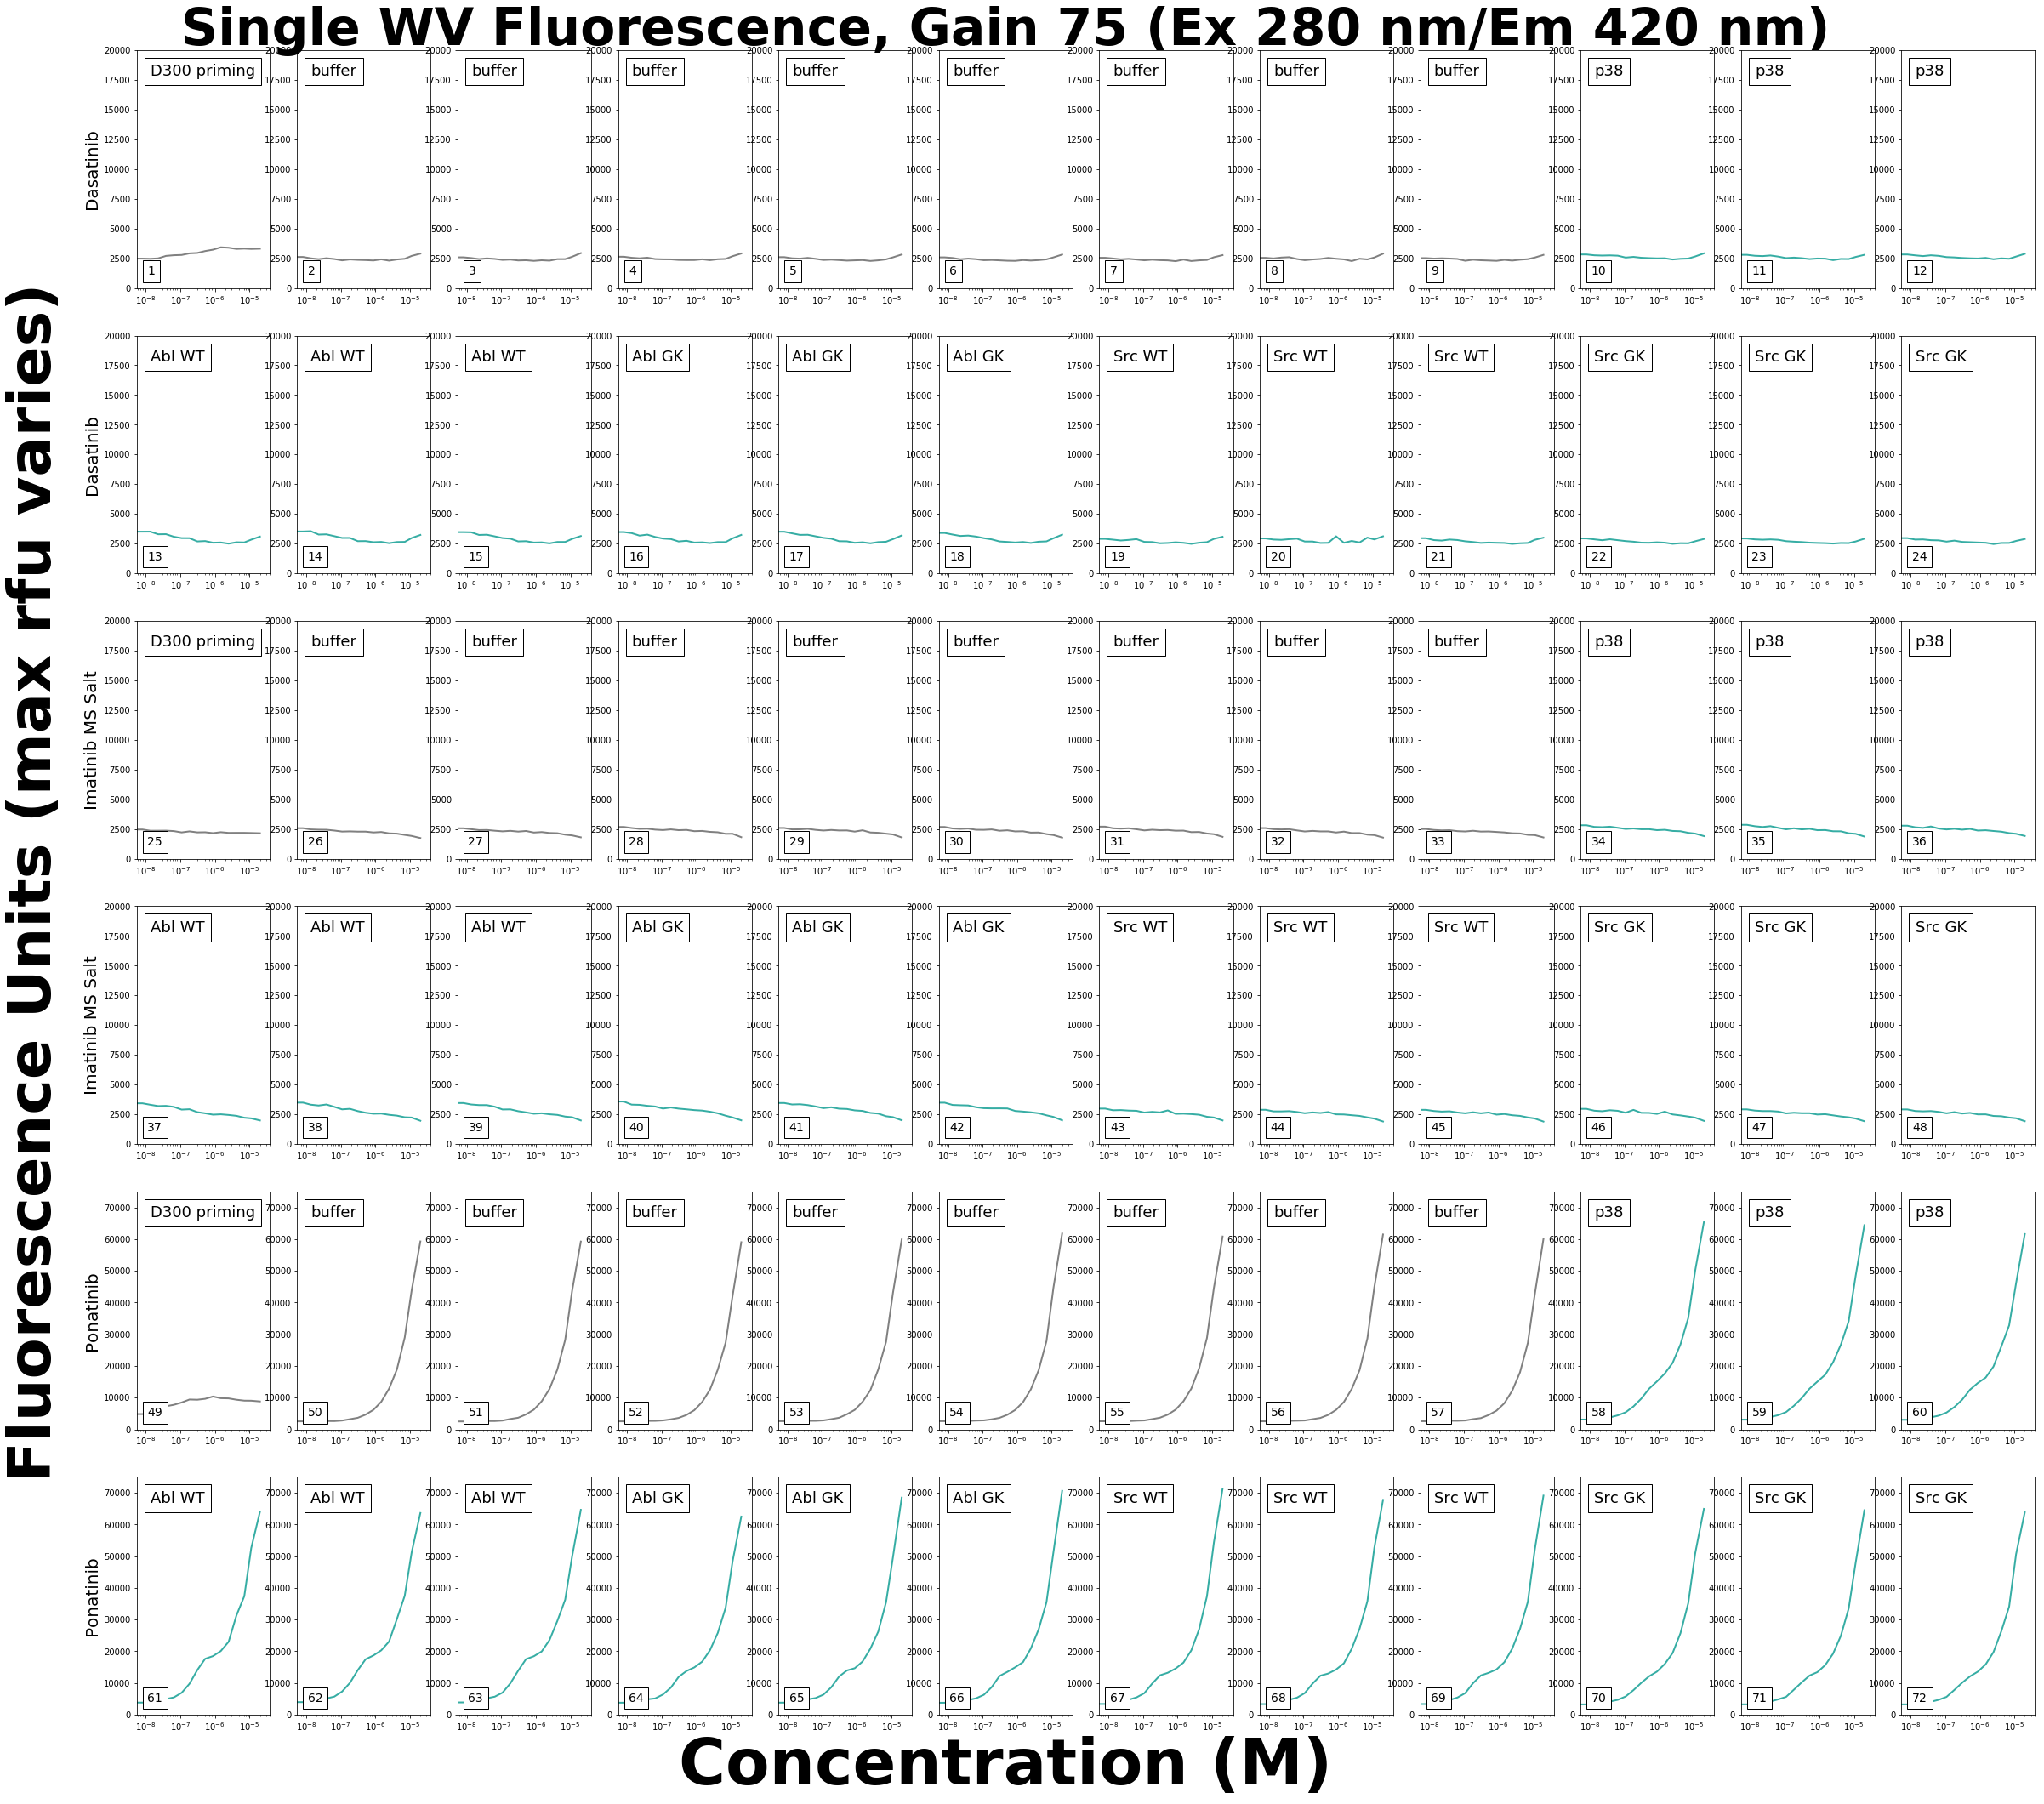

In [3]:
nrows = 6
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Single WV Fluorescence, Gain 75 (Ex 280 nm/Em 420 nm)'

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[5]

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_420[row_index,col_index,:], c=color, linewidth=2);

        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 65:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=60, fontweight='bold')
        if index == 61:
            axis = plt.gca()
            plt.ylabel('Fluorescence Units (max rfu varies)', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,3.5)

        if index < 48:
            plt.ylim(0,20000)
        else:
            plt.ylim(0,75000)
                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Dasatinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Imatinib MS Salt', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Ponatinib', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

fig.savefig('20190410_single_well_ligs5-8_420_gain75_log_y.pdf', bbox_inches='tight', dpi=300)

# Ex 296/Em 378 nm

In [2]:
# need to associate reads with correct well
# also have to assign well IDs weirdly since Infinite script only reads sections of plate
nrows = 6
ncols = 12
index = 0

label = 'ex296_em378_top_gain65_bw10'

data_378 = np.zeros([nrows, ncols, nreads], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        if row_index == 4 or row_index == 5:
            row = '%c' % (ord('C')+row_index)
        else:
            row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements = [(reads[i][label][well]) for i in range(nreads)]
        for i in range(nreads):
            measurements = [x if x != 'OVER' else 70000 for x in measurements]
            measurements = [float(i) for i in measurements]
        data_378[row_index,col_index,:] = np.array(measurements)
        print(well)
        print(data_378[row_index,col_index,:])

A1
[2536. 2464. 2452. 2497. 2382. 2387. 2394. 2389. 2343. 2359. 2297. 2264.
 2279. 2298. 2283. 2276. 2191.]
A2
[2705. 2631. 2617. 2591. 2571. 2473. 2484. 2465. 2388. 2366. 2400. 2324.
 2319. 2311. 2348. 2345. 2327.]
A3
[2764. 2659. 2590. 2569. 2575. 2522. 2508. 2460. 2384. 2366. 2388. 2315.
 2338. 2335. 2334. 2343. 2309.]
A4
[2746. 2650. 2622. 2583. 2564. 2494. 2518. 2472. 2434. 2408. 2396. 2336.
 2354. 2355. 2450. 2394. 2333.]
A5
[2749. 2654. 2581. 2634. 2584. 2520. 2532. 2482. 2469. 2394. 2418. 2348.
 2350. 2467. 2378. 2366. 2328.]
A6
[2770. 2650. 2660. 2622. 2547. 2516. 2558. 2471. 2454. 2427. 2427. 2370.
 2374. 2459. 2390. 2358. 2309.]
A7
[2733. 2606. 2579. 2612. 2539. 2519. 2502. 2478. 2430. 2423. 2351. 2382.
 2377. 2438. 2376. 2340. 2279.]
A8
[2748. 2623. 2643. 2560. 2571. 2514. 2522. 2484. 2418. 2362. 2418. 2301.
 2394. 2399. 2343. 2370. 2278.]
A9
[2707. 2580. 2571. 2516. 2513. 2474. 2502. 2506. 2401. 2394. 2374. 2358.
 2370. 2313. 2356. 2359. 2318.]
A10
[2754. 2716. 2667. 2624.

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

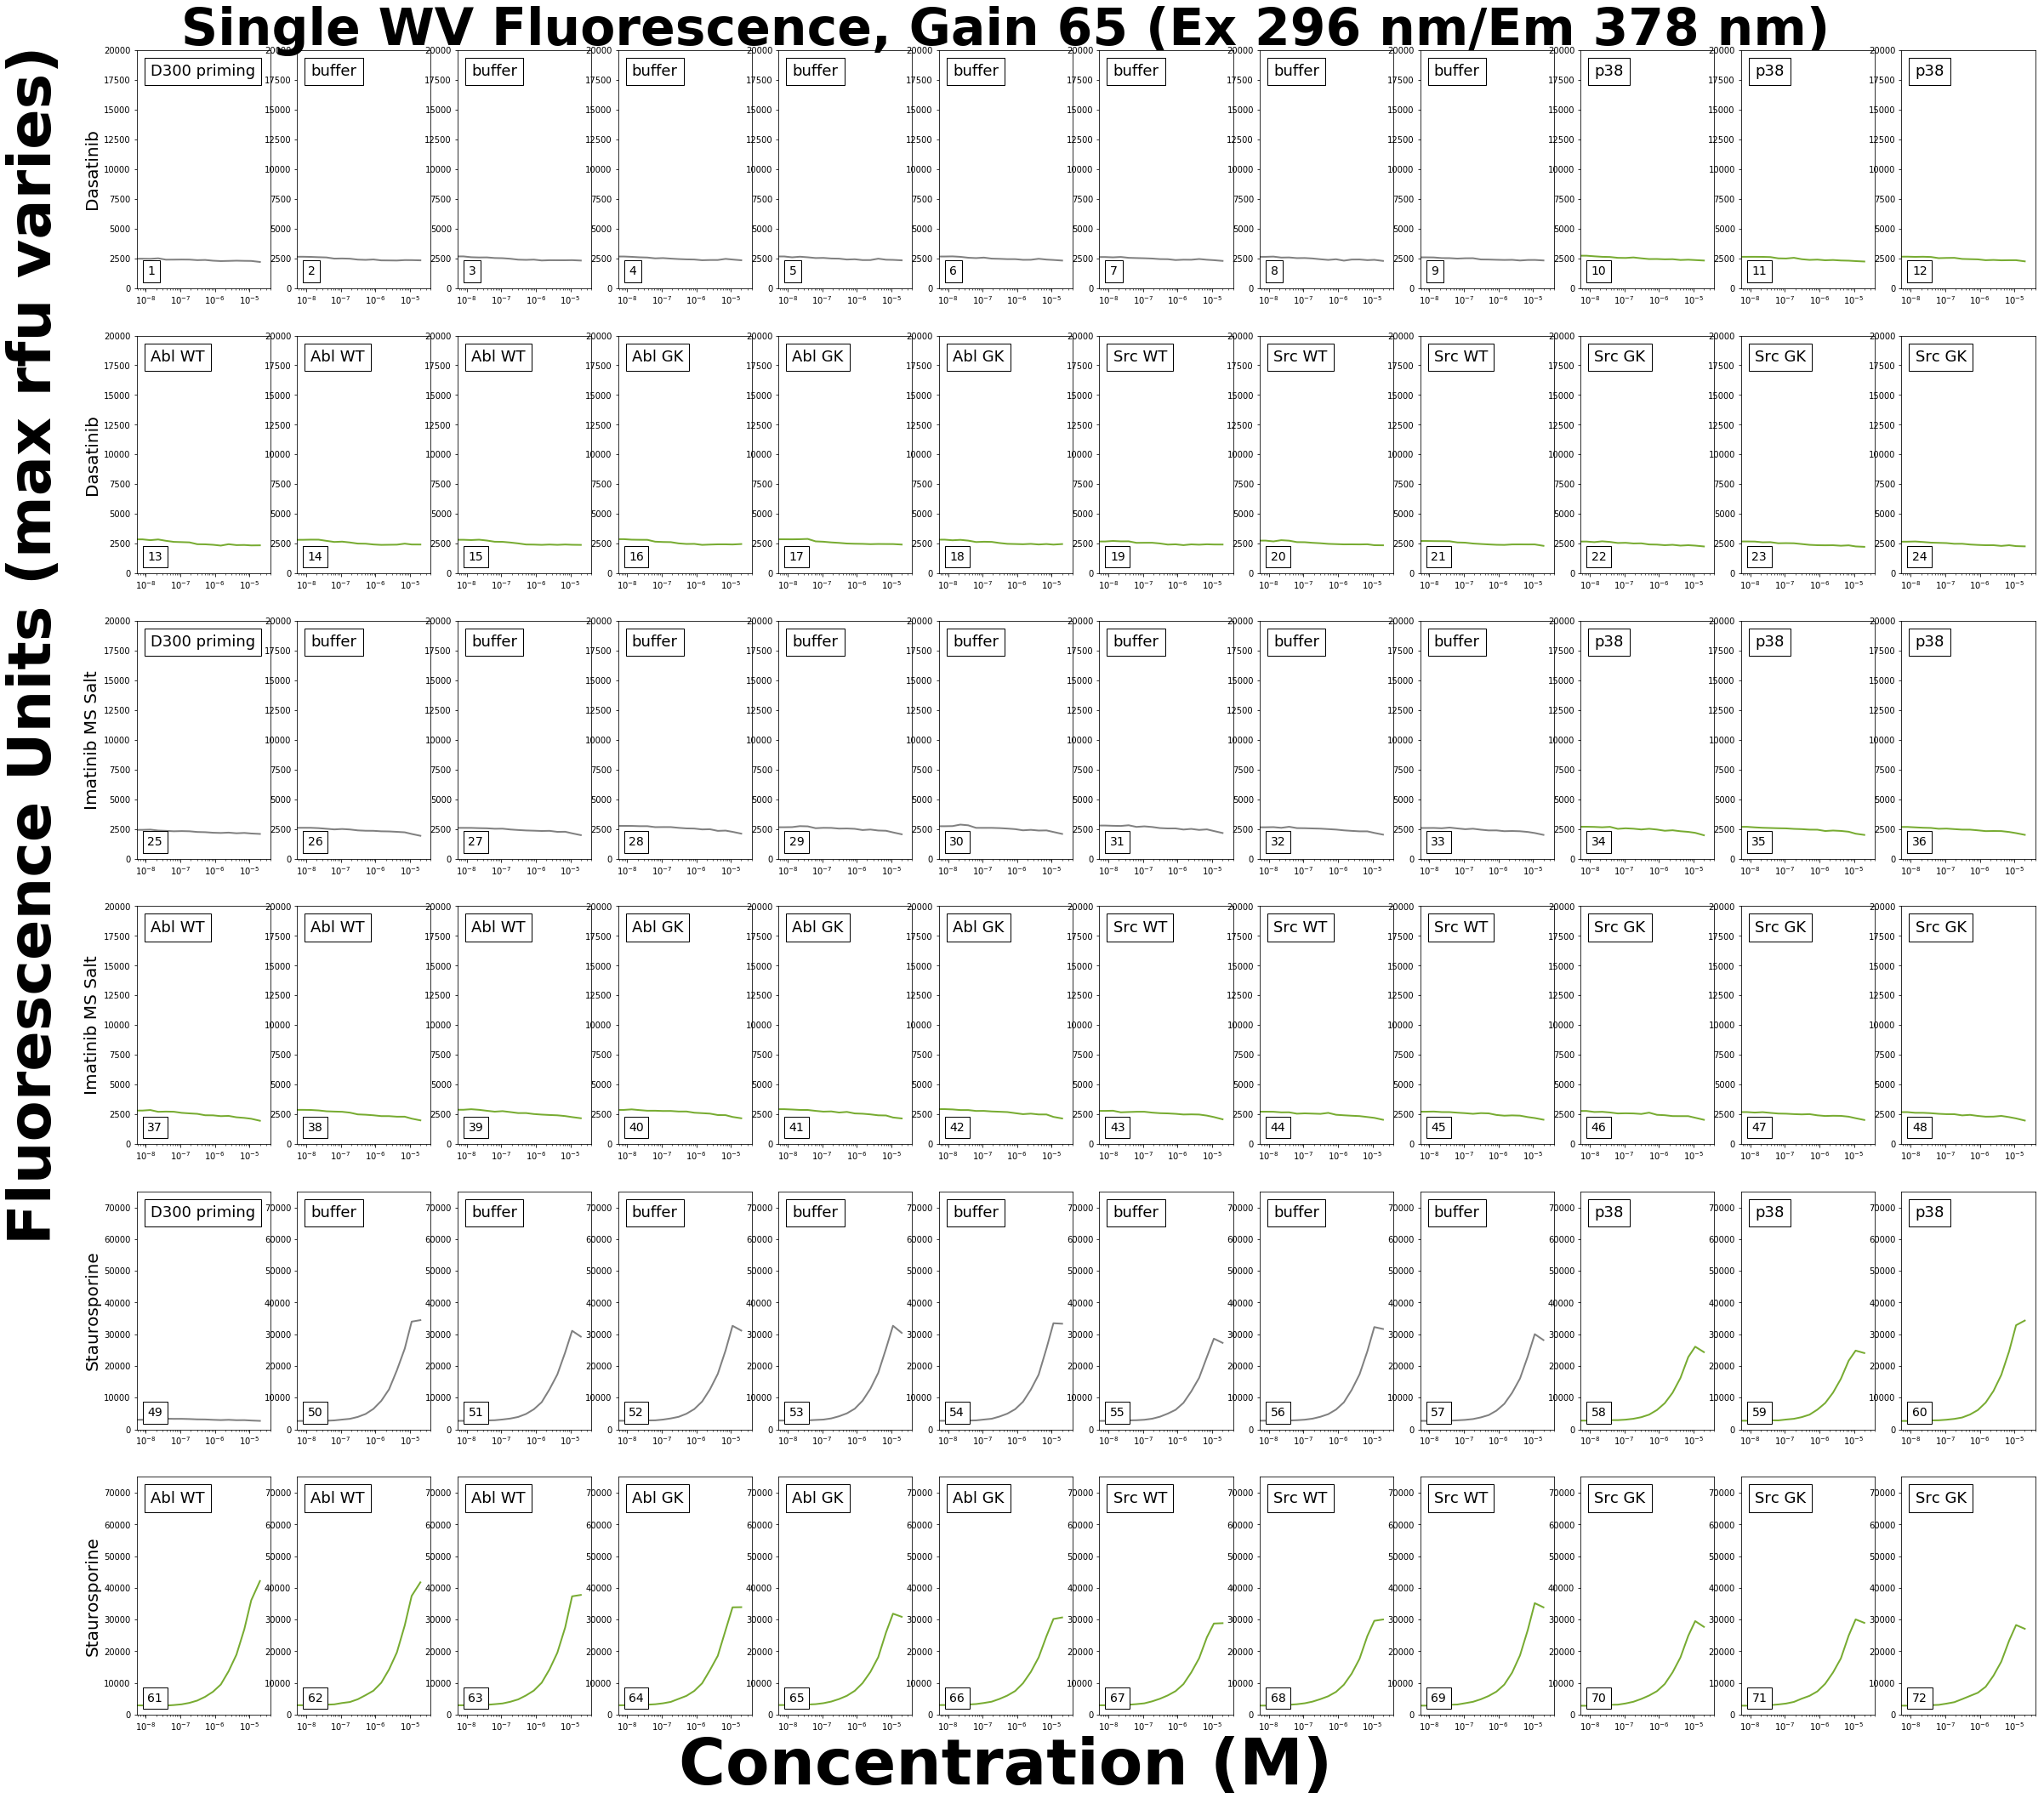

In [5]:
nrows = 6
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Single WV Fluorescence, Gain 65 (Ex 296 nm/Em 378 nm)'

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[3]

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        if row_index == 4 or row_index == 5:
            row = '%c' % (ord('C')+row_index)
        else:
            row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_378[row_index,col_index,:], c=color, linewidth=2);

        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 65:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=60, fontweight='bold')
        if index == 61:
            axis = plt.gca()
            plt.ylabel('Fluorescence Units (max rfu varies)', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,4.5)

        if index < 48:
            plt.ylim(0,20000)
        else:
            plt.ylim(0,75000)
                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Dasatinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Imatinib MS Salt', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

fig.savefig('20190410_single_well_ligs5-8_378_gain65_log_y.pdf', bbox_inches='tight', dpi=300)

# Ex 296/Em 396 nm

In [3]:
# need to associate reads with correct well
nrows = 6
ncols = 12
index = 0

label = 'ex296_em396_top_gain65_bw10'

data_396 = np.zeros([nrows, ncols, nreads], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        if row_index == 4 or row_index == 5:
            row = '%c' % (ord('C')+row_index)
        else:
            row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements = [(reads[i][label][well]) for i in range(nreads)]
        for i in range(nreads):
            measurements = [x if x != 'OVER' else 70000 for x in measurements]
            measurements = [float(i) for i in measurements]
        data_396[row_index,col_index,:] = np.array(measurements)
        print(well)
        print(data_396[row_index,col_index,:])

A1
[1288. 1274. 1245. 1302. 1262. 1280. 1277. 1253. 1235. 1273. 1242. 1265.
 1251. 1236. 1229. 1227. 1222.]
A2
[1385. 1376. 1306. 1350. 1324. 1301. 1282. 1220. 1214. 1236. 1190. 1218.
 1199. 1224. 1218. 1246. 1273.]
A3
[1402. 1378. 1328. 1330. 1301. 1305. 1304. 1260. 1234. 1255. 1204. 1231.
 1220. 1200. 1220. 1261. 1274.]
A4
[1400. 1376. 1332. 1338. 1308. 1315. 1315. 1276. 1239. 1261. 1228. 1225.
 1242. 1247. 1213. 1241. 1269.]
A5
[1389. 1390. 1366. 1343. 1305. 1346. 1316. 1285. 1236. 1267. 1224. 1230.
 1201. 1227. 1248. 1230. 1289.]
A6
[1399. 1392. 1345. 1341. 1320. 1323. 1304. 1285. 1254. 1257. 1252. 1255.
 1210. 1229. 1222. 1227. 1306.]
A7
[1383. 1386. 1335. 1351. 1330. 1305. 1284. 1270. 1261. 1263. 1212. 1245.
 1243. 1215. 1206. 1233. 1320.]
A8
[1363. 1379. 1322. 1342. 1312. 1321. 1281. 1285. 1259. 1273. 1191. 1212.
 1189. 1214. 1217. 1235. 1299.]
A9
[1385. 1352. 1310. 1340. 1304. 1304. 1292. 1267. 1231. 1271. 1196. 1196.
 1188. 1183. 1187. 1224. 1242.]
A10
[1391. 1382. 1335. 1349.

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

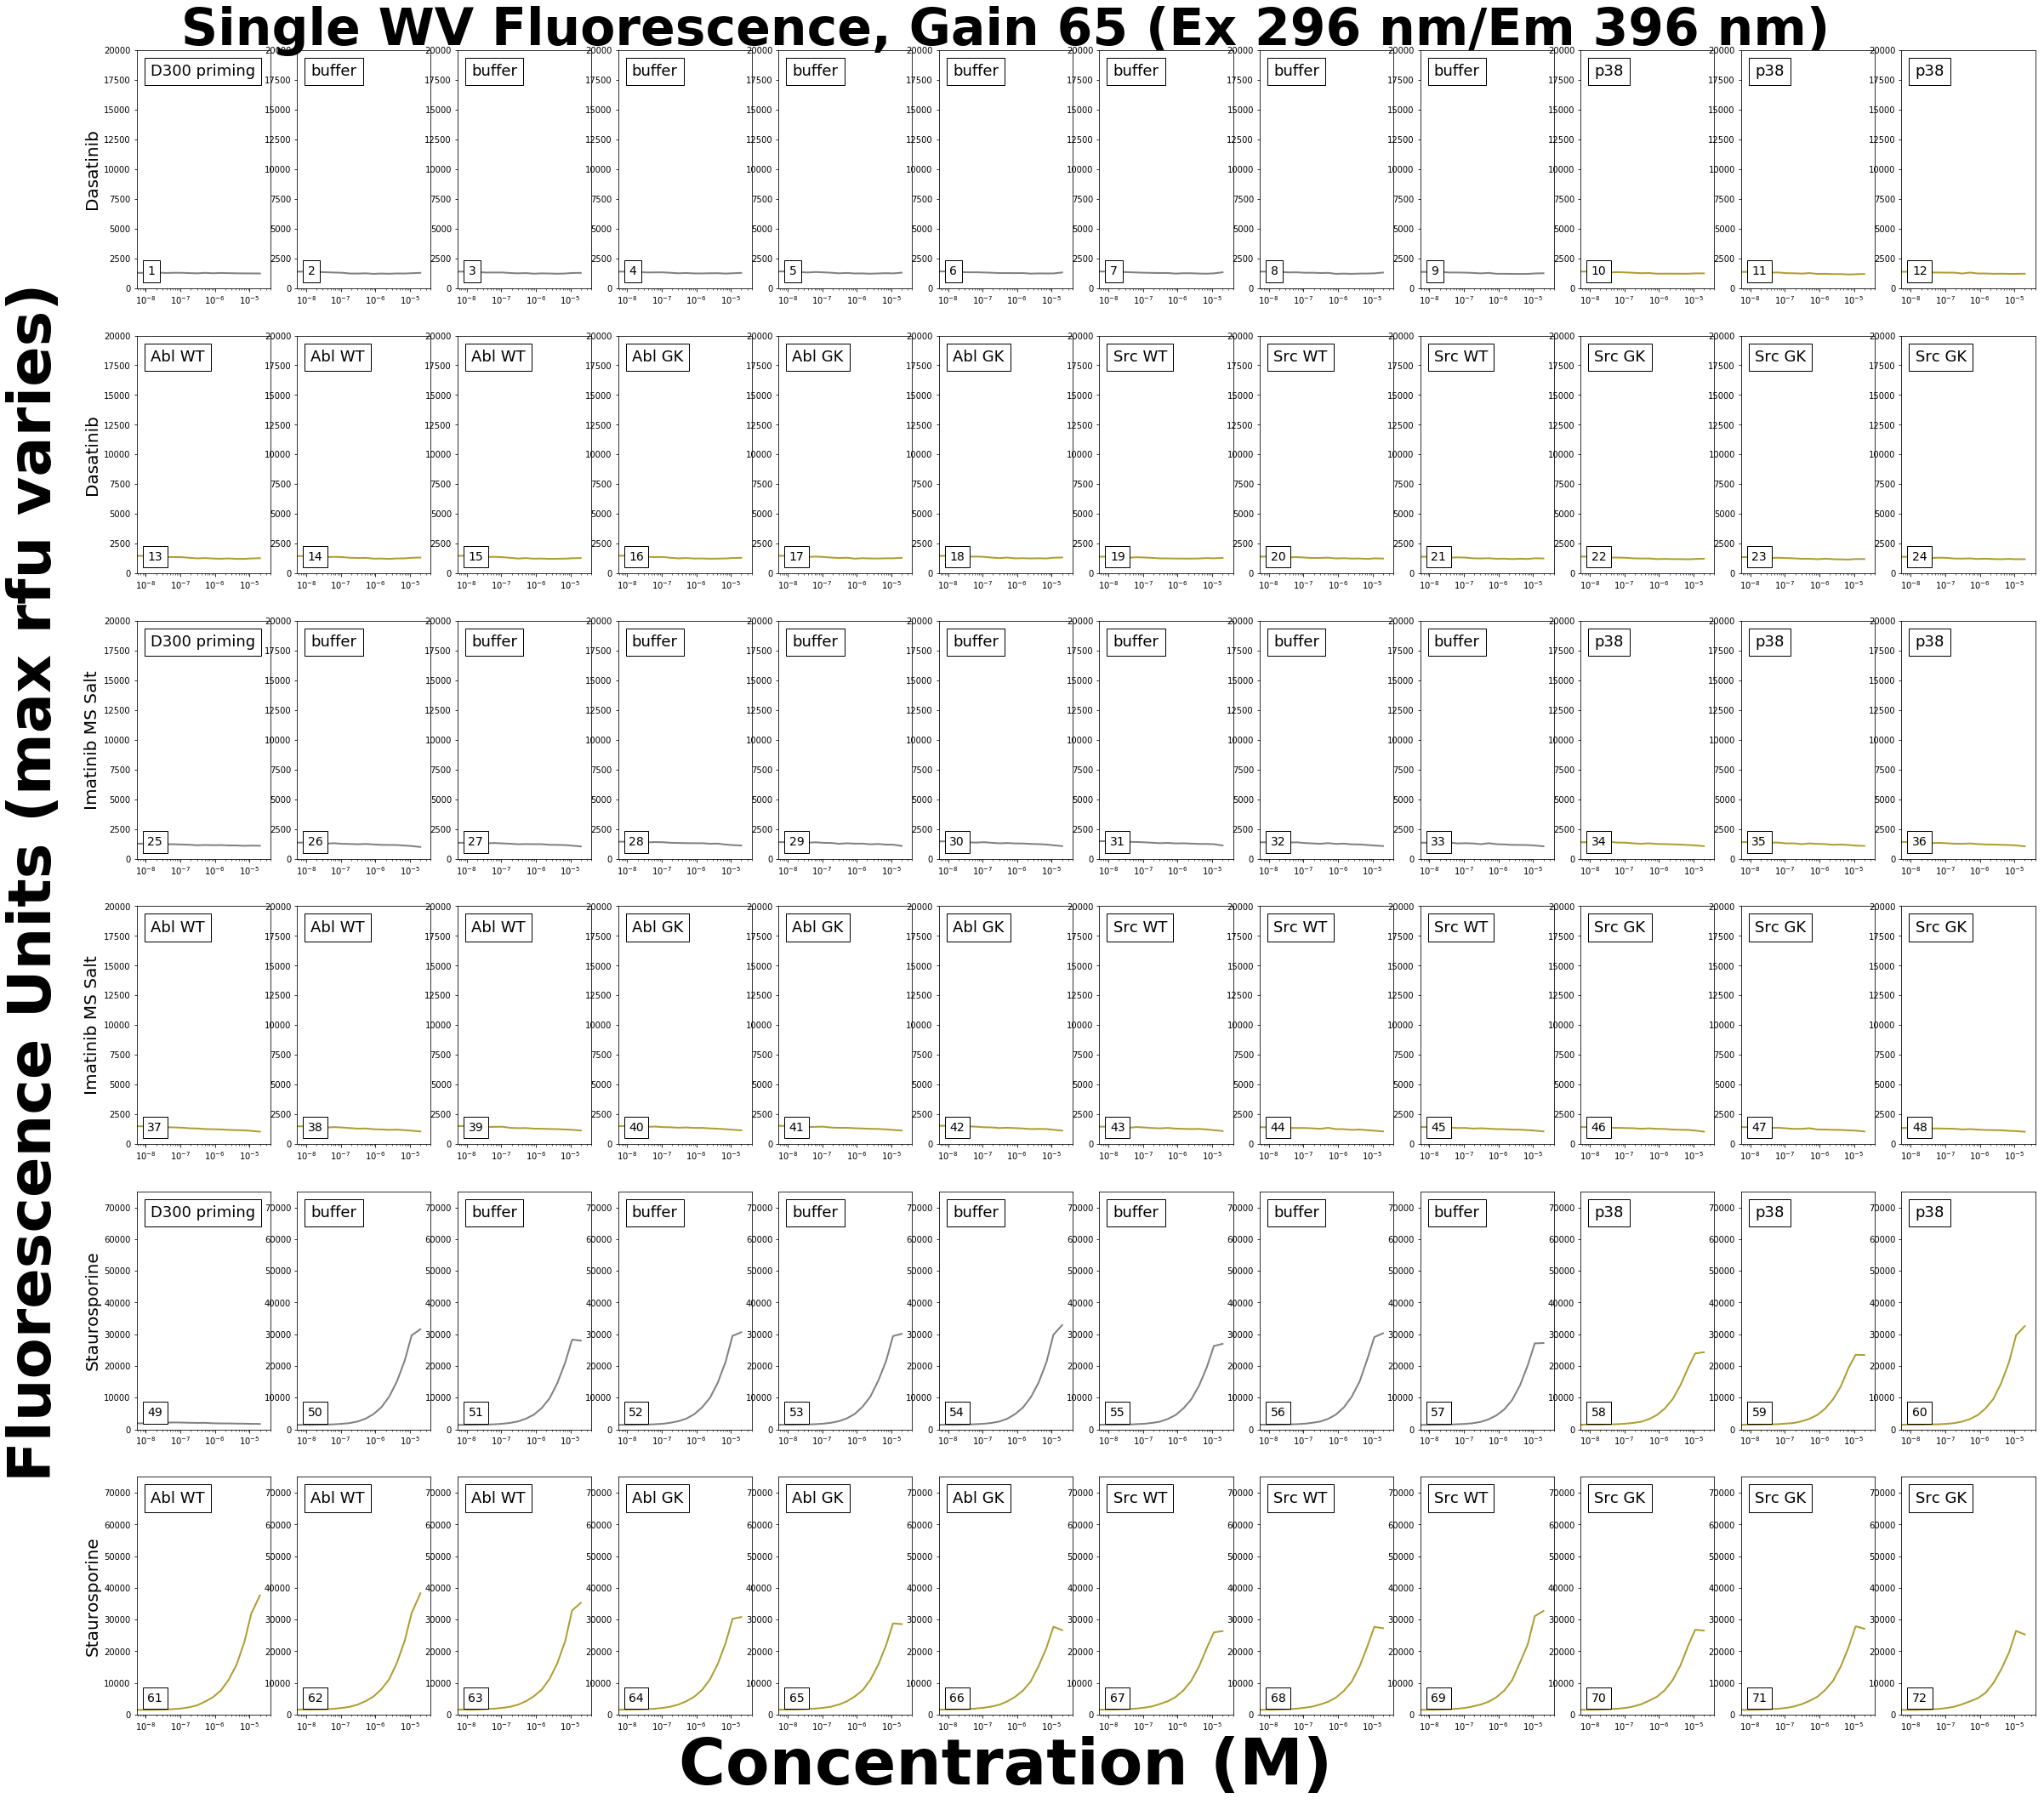

In [7]:
nrows = 6
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Single WV Fluorescence, Gain 65 (Ex 296 nm/Em 396 nm)'

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[2]

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        if row_index == 4 or row_index == 5:
            row = '%c' % (ord('C')+row_index)
        else:
            row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_396[row_index,col_index,:], c=color, linewidth=2);

        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 65:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=60, fontweight='bold')
        if index == 61:
            axis = plt.gca()
            plt.ylabel('Fluorescence Units (max rfu varies)', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,3.5)

        if index < 48:
            plt.ylim(0,20000)
        else:
            plt.ylim(0,75000)
                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Dasatinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Imatinib MS Salt', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

fig.savefig('20190410_single_well_ligs5-8_396_gain65_log_y.pdf', bbox_inches='tight', dpi=300)

# Ex 280/Em 480 nm 

In [12]:
# need to associate reads with correct well
nrows = 4
ncols = 12
index = 0

label = 'ex280_em480_top_gain100'

data_480 = np.zeros([nrows, ncols, nreads], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements = [(reads[i][label][well]) for i in range(nreads)]
        for i in range(nreads):
            measurements = [x if x != 'OVER' else 70000 for x in measurements]
            measurements = [float(i) for i in measurements]
        data_480[row_index,col_index,:] = np.array(measurements)
        print(well)
        print(data_480[row_index,col_index,:])

A1
[3472. 3413. 3583. 3881. 3931. 4274. 4561. 4735. 4986. 5376. 5636. 6189.
 6761. 6316. 6691. 6739. 6929.]
A2
[3692. 3584. 3724. 3747. 3705. 3706. 3747. 3590. 3597. 3683. 3600. 3599.
 3737. 3768. 3960. 4290. 4877.]
A3
[3735. 3570. 3764. 3836. 3601. 3688. 3640. 3607. 3592. 3598. 3647. 3541.
 3733. 3811. 3878. 4327. 4977.]
A4
[3719. 3654. 3760. 3809. 3749. 3910. 3874. 3754. 3711. 3792. 3771. 3800.
 3850. 3918. 4055. 4553. 4859.]
A5
[3791. 3574. 3813. 3722. 3768. 3741. 3680. 3699. 3634. 3687. 3676. 3683.
 3775. 3897. 4068. 4364. 4749.]
A6
[3786. 3614. 3725. 3849. 3650. 3645. 3790. 3683. 3623. 3655. 3612. 3721.
 3808. 3813. 3946. 4323. 4770.]
A7
[3662. 3538. 3757. 3792. 3605. 3719. 3669. 3607. 3629. 3627. 3578. 3739.
 3735. 3759. 4034. 4187. 4798.]
A8
[3684. 3628. 4158. 3810. 3693. 3717. 4189. 3574. 3633. 3716. 3634. 3653.
 3765. 3863. 4034. 4434. 5049.]
A9
[3621. 3563. 3711. 3750. 3770. 3751. 3664. 3730. 3655. 3663. 3768. 3684.
 3742. 3775. 4082. 4316. 5110.]
A10
[3922. 3714. 3931. 3988.

## Plot fluorescence at single wv (480 nm)

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

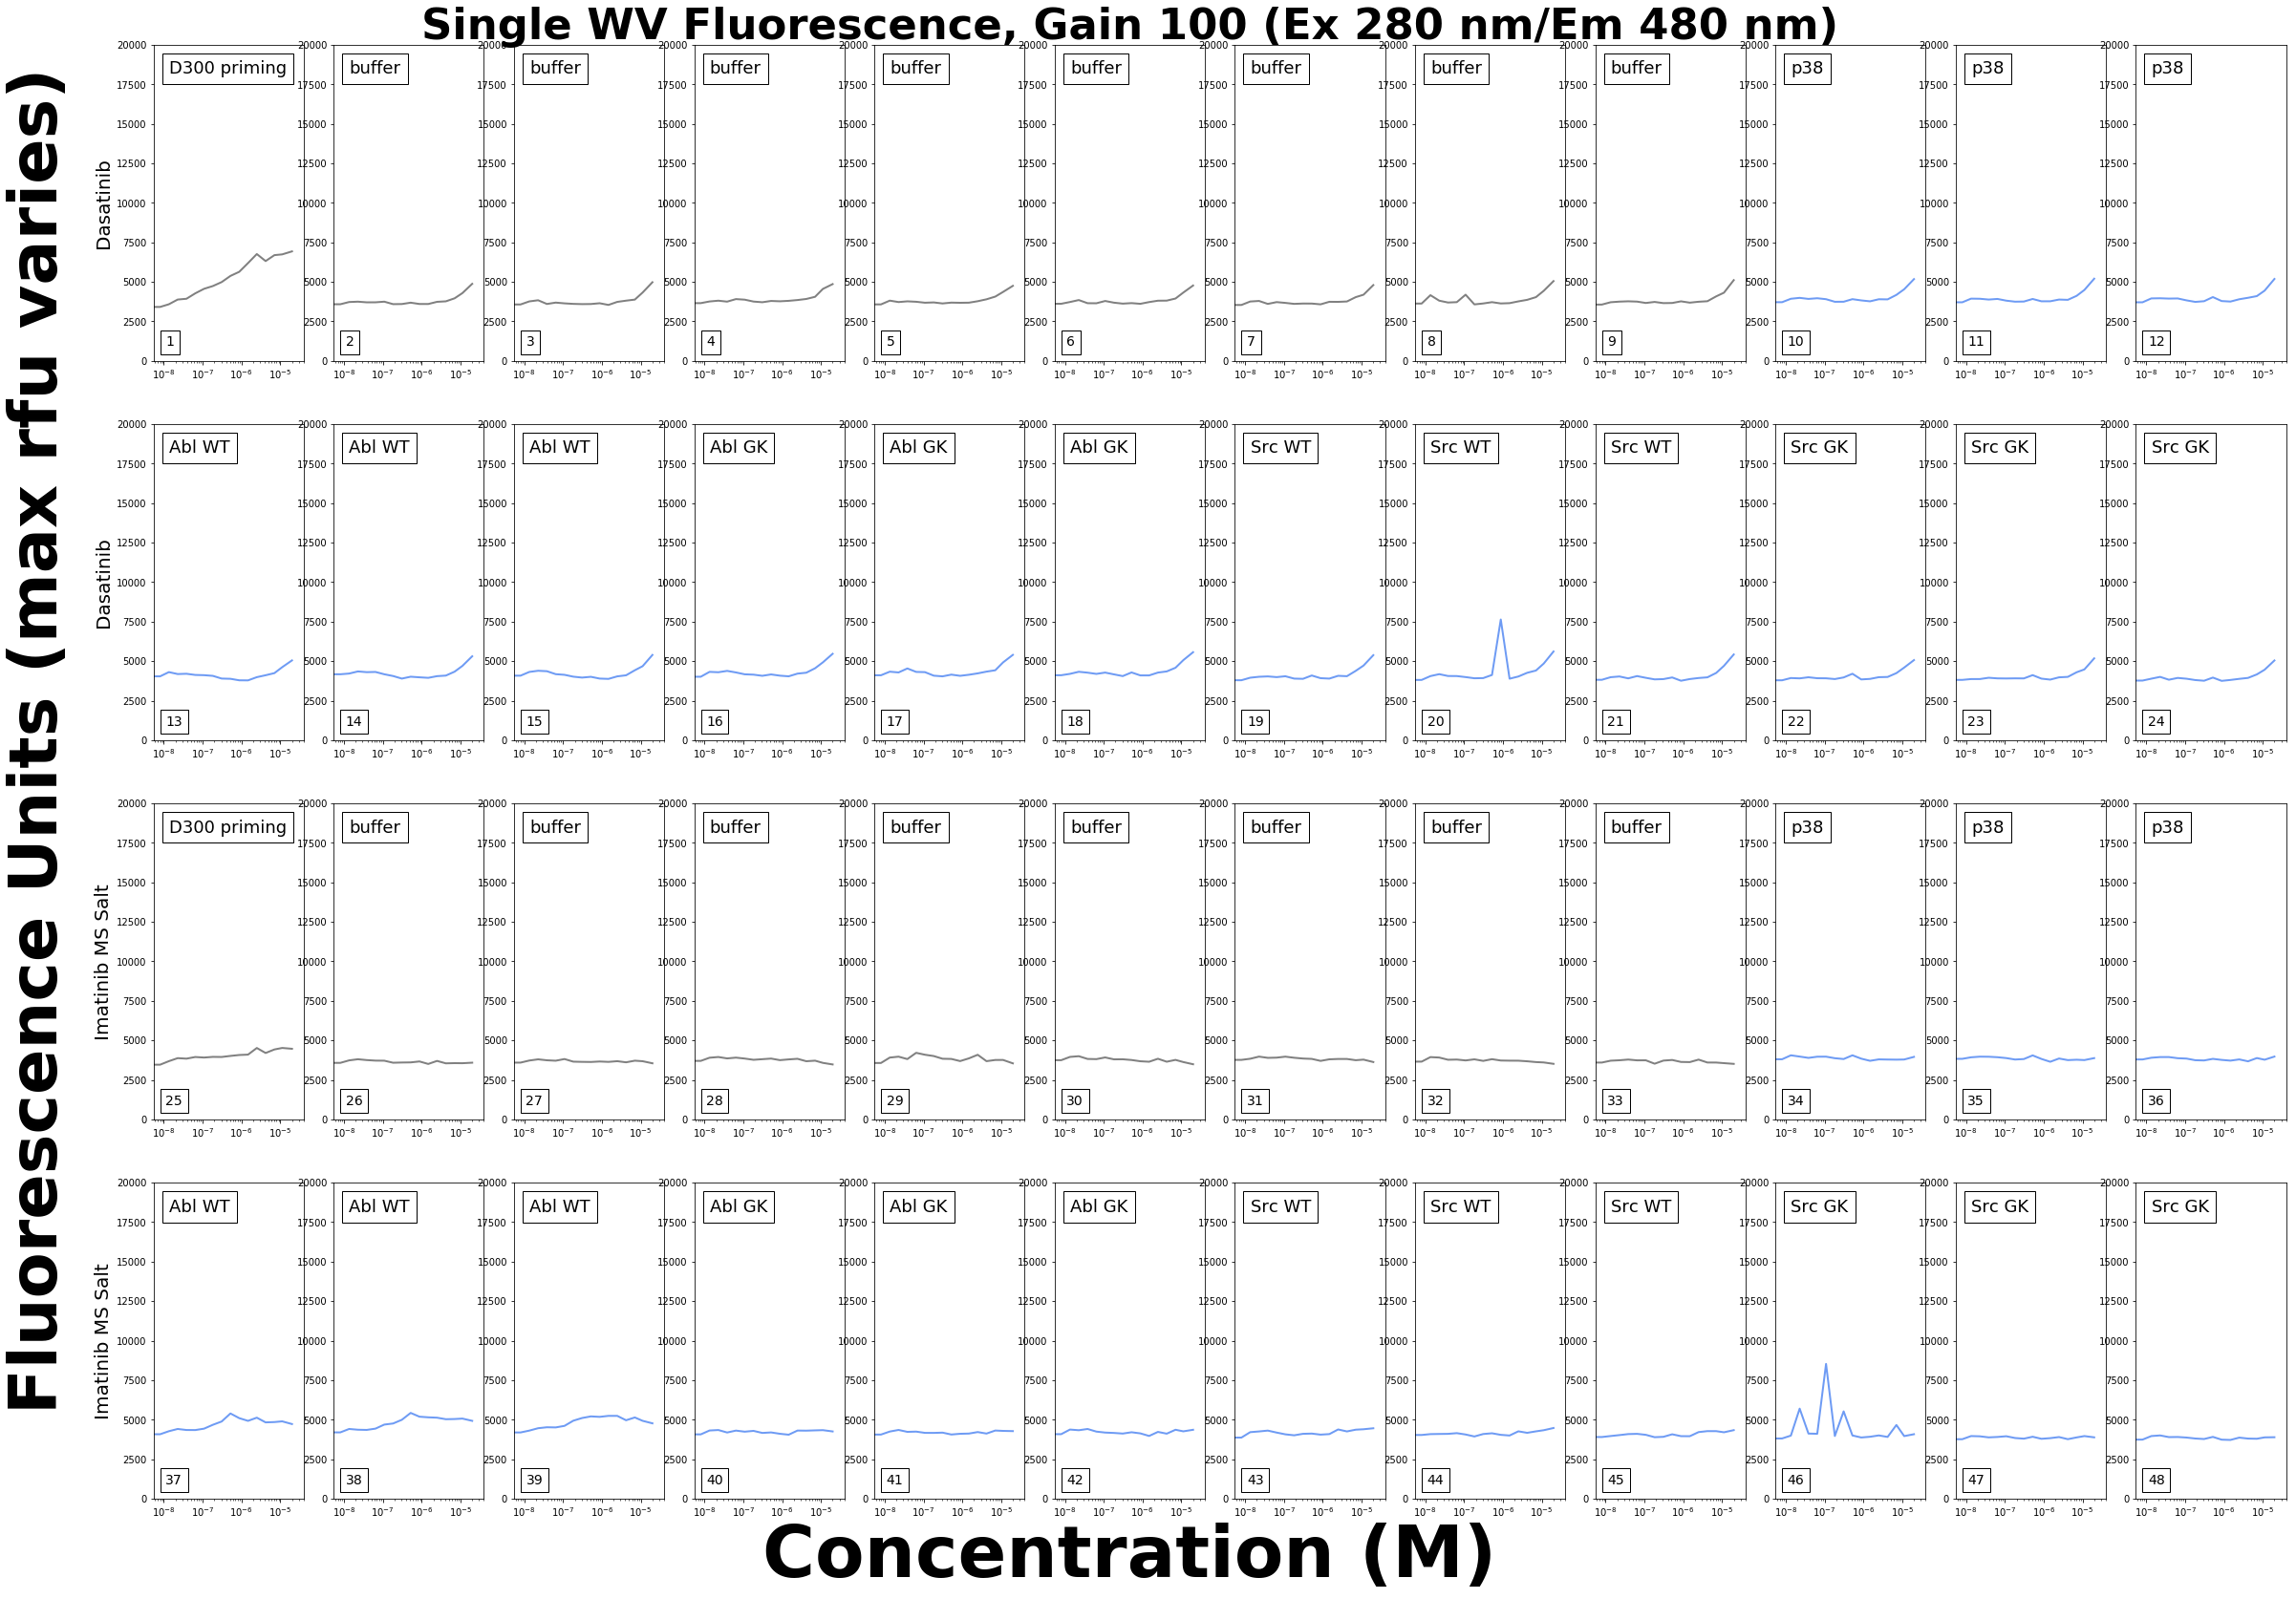

In [19]:
nrows = 4
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,28])

title = 'Single WV Fluorescence, Gain 100 (Ex 280 nm/Em 480 nm)'

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[7]

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_480[row_index,col_index,:], c=color, linewidth=2);

        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 41:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=45, fontweight='bold')
        if index == 13:
            axis = plt.gca()
            plt.ylabel('Fluorescence Units (max rfu varies)', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,0)

        plt.ylim(0,20000)
                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Dasatinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Imatinib MS Salt', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

fig.savefig('20190410_single_well_ligs5-8_480_gain100_log_y.pdf', bbox_inches='tight', dpi=300)

# Overlay one well of buffer with ponatinib & staurosporine on same plots

## Ponatinib ex 280/em 420

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

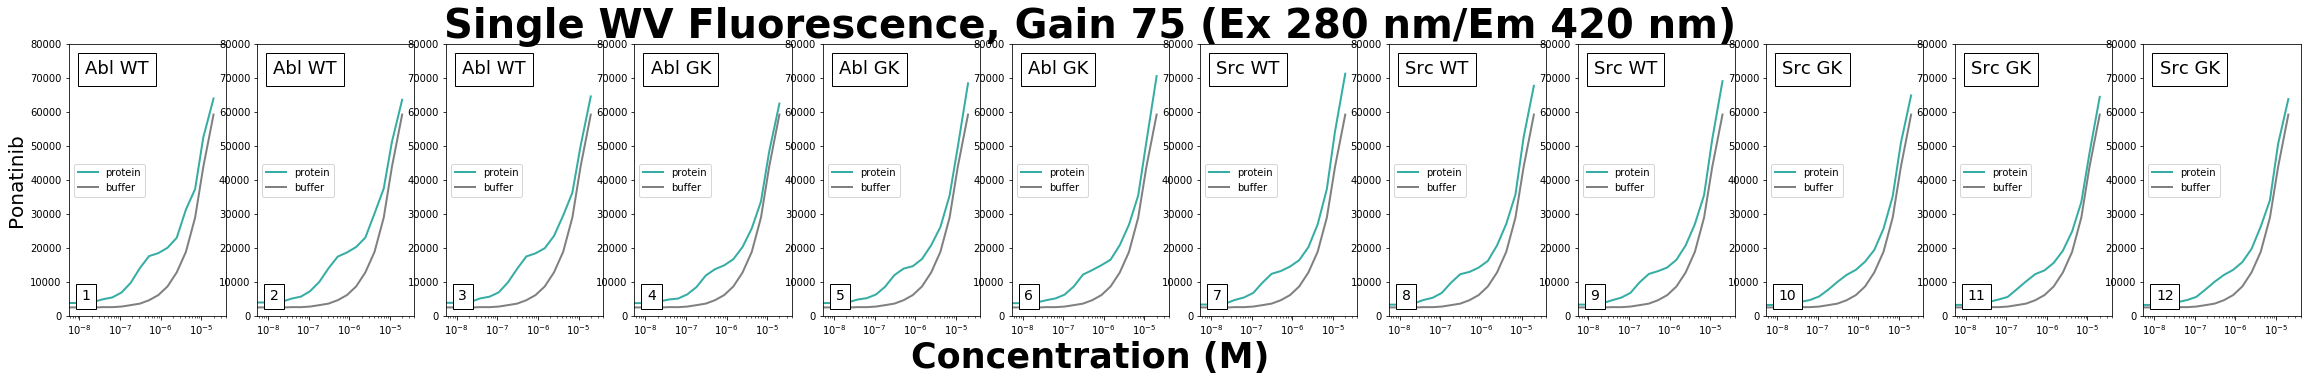

In [20]:
# plot buffer and protein (Abl and Src) on same plot for ponatinib at Ex 280/Em 420

nrows = 1
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,5])

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[5]

title = 'Single WV Fluorescence, Gain 75 (Ex 280 nm/Em 420 nm)'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('F')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_420[row_index+5,col_index,:], c=color, linewidth=2, label='protein');
            
        plt.legend(loc='center left')
        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 5:
            plt.xlabel('Concentration (M)', fontsize=35, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=40, fontweight='bold')

        plt.ylim(0,80000)
                
        # ligand labels

        if index == 0:
            plt.ylabel('Ponatinib', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

index = 0
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('E')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            plt.semilogx(x_values, data_420[4,1,:], c='0.5', linewidth=2, label='buffer');
            plt.legend(loc='center left')
        index += 1
            
fig.savefig('20190410_ponatinib_420_gain75_log_y.pdf', bbox_inches='tight', dpi=300)

## Staurosporine ex 296/em 378

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

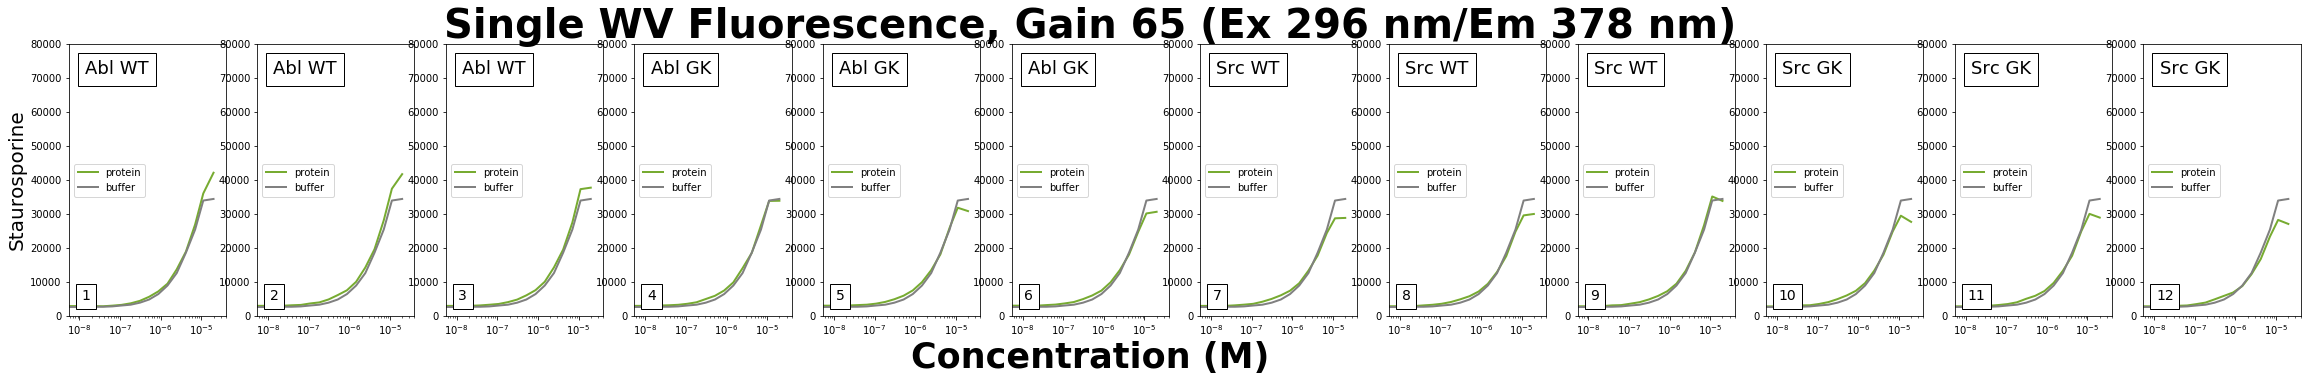

In [22]:
# plot buffer and protein (Abl and Src) on same plot for staurosporine at Ex 296/Em 378

nrows = 1
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,5])

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[3]

title = 'Single WV Fluorescence, Gain 65 (Ex 296 nm/Em 378 nm)'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('H')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_378[row_index+5,col_index,:], c=color, linewidth=2, label='protein');
            
        plt.legend(loc='center left')
        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 5:
            plt.xlabel('Concentration (M)', fontsize=35, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=40, fontweight='bold')

        plt.ylim(0,80000)
                
        # ligand labels

        if index == 0:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

index = 0
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('G')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            plt.semilogx(x_values, data_378[4,1,:], c='0.5', linewidth=2, label='buffer');
            plt.legend(loc='center left')
        index += 1
            
fig.savefig('20190410_stauro_378_gain75_log_y.pdf', bbox_inches='tight', dpi=300)

## Staurosporine Ex 296/Em 396

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

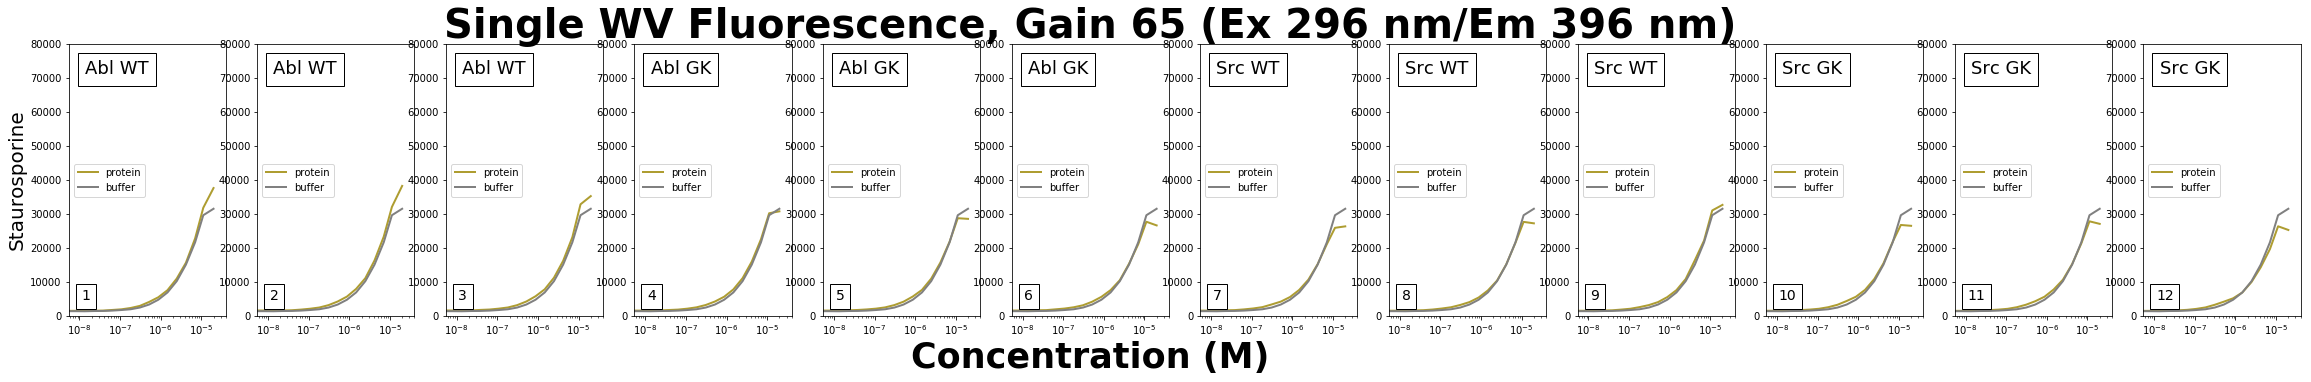

In [23]:
# plot buffer and protein (Abl and Src) on same plot for staurosporine at Ex 296/Em 396

nrows = 1
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,5])

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[2]

title = 'Single WV Fluorescence, Gain 65 (Ex 296 nm/Em 396 nm)'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('H')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_396[row_index+5,col_index,:], c=color, linewidth=2, label='protein');
            
        plt.legend(loc='center left')
        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 5:
            plt.xlabel('Concentration (M)', fontsize=35, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=40, fontweight='bold')

        plt.ylim(0,80000)
                
        # ligand labels

        if index == 0:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

index = 0
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('G')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            plt.semilogx(x_values, data_396[4,1,:], c='0.5', linewidth=2, label='buffer');
            plt.legend(loc='center left')
        index += 1
            
fig.savefig('20190410_stauro_396_gain75_log_y.pdf', bbox_inches='tight', dpi=300)

## p38 & Staurosporine overlay

In [15]:
nrows = 1
ncols = 3
index = 0

for row_index in range(nrows):
    for col_index in range(ncols):
        print(data_378[row_index+4,col_index+9,:])
    
    index += 1

[ 2822.  2755.  2715.  2753.  2916.  2913.  3061.  3349.  3841.  4642.
  6103.  8259. 11557. 16196. 22794. 26084. 24361.]
[ 2788.  2723.  2706.  2688.  2857.  2823.  3099.  3335.  3855.  4641.
  6224.  8301. 11583. 15925. 21666. 24841. 24064.]
[ 2739.  2653.  2707.  2665.  2828.  2859.  3039.  3305.  3742.  4673.
  6083.  8434. 12104. 17182. 24648. 32844. 34315.]


/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

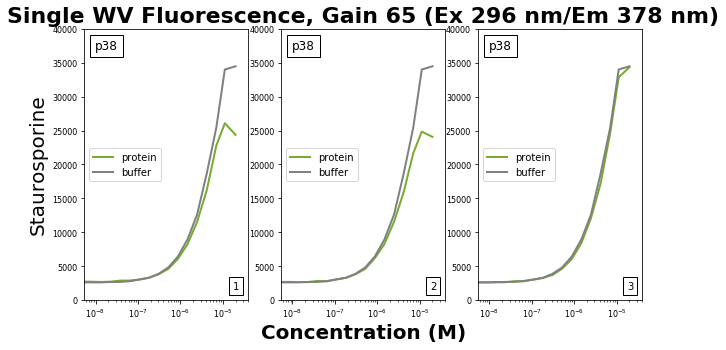

In [32]:
# plot buffer and protein (p38) on same plot for staurosporine at Ex 296/Em 378

nrows = 1
ncols = 3
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[10,5])

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[3]

title = 'Single WV Fluorescence, Gain 65 (Ex 296 nm/Em 378 nm)'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('G')+row_index)
        col = '%d' % (col_index+10)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            color=protein_color
            plt.semilogx(x_values, data_378[row_index+4,col_index+9,:], c=color, linewidth=2, label='protein');
            
        plt.legend(loc='center left')
        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=8)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=12))
            ax.add_artist(anchored_text)
        if index == 1:
            plt.xlabel('Concentration (M)', fontsize=20, fontweight='bold')
        if index == 1:
            plt.title(title, loc='center', fontsize=22, fontweight='bold')

        plt.ylim(0,40000)
                

        if index == 0:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc='lower right', prop=dict(size=10))
        ax.add_artist(anchored_text2)

index = 0
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('G')+row_index)
        col = '%d' % (col_index+2)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax2 = plt.subplot(nrows,ncols,index+1)
            plt.semilogx(x_values, data_378[4,1,:], c='0.5', linewidth=2, label='buffer');
        plt.legend(loc='center left')
        index += 1
            
fig.savefig('20190426_p38_stauro_378_gain65_log_y.pdf', bbox_inches='tight', dpi=300)

In [25]:
nrows = 1
ncols = 3
index = 0

for row_index in range(nrows):
    for col_index in range(ncols):
        print(data_396[row_index+4,col_index+9,:])
    
    index += 1

[ 1469.  1482.  1472.  1500.  1553.  1638.  1793.  2048.  2403.  3245.
  4538.  6577.  9503. 13919. 19493. 23955. 24325.]
[ 1465.  1465.  1459.  1505.  1559.  1631.  1822.  2010.  2538.  3340.
  4567.  6574.  9476. 13562. 19470. 23522. 23447.]
[ 1423.  1463.  1447.  1478.  1561.  1593.  1742.  1969.  2452.  3250.
  4516.  6660.  9631. 14665. 21307. 29680. 32582.]


/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

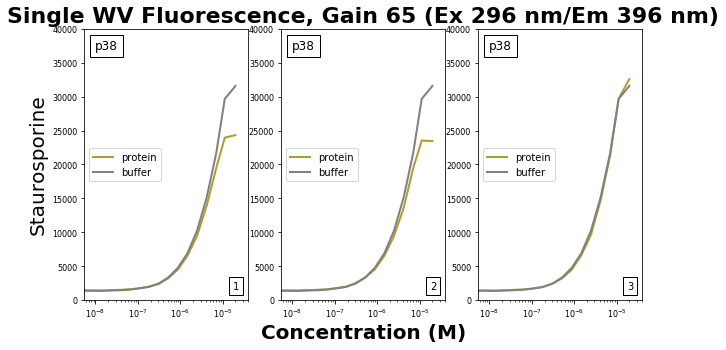

In [36]:
# plot buffer and protein (p38) on same plot for staurosporine at Ex 296/Em 396

nrows = 1
ncols = 3
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[10,5])

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[2]

title = 'Single WV Fluorescence, Gain 65 (Ex 296 nm/Em 396 nm)'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('G')+row_index)
        col = '%d' % (col_index+10)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            color=protein_color
            plt.semilogx(x_values, data_396[row_index+4,col_index+9,:], c=color, linewidth=2, label='protein');
            
        plt.legend(loc='center left')
        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=8)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=12))
            ax.add_artist(anchored_text)
        if index == 1:
            plt.xlabel('Concentration (M)', fontsize=20, fontweight='bold')
        if index == 1:
            plt.title(title, loc='center', fontsize=22, fontweight='bold')

        plt.ylim(0,40000)
                

        if index == 0:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc='lower right', prop=dict(size=10))
        ax.add_artist(anchored_text2)

index = 0
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('G')+row_index)
        col = '%d' % (col_index+2)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax2 = plt.subplot(nrows,ncols,index+1)
            plt.semilogx(x_values, data_396[4,1,:], c='0.5', linewidth=2, label='buffer');
        plt.legend(loc='center left')
        index += 1
            
fig.savefig('20190426_p38_stauro_396_gain65_log_y.pdf', bbox_inches='tight', dpi=300)

## plot p38 & staurosporine replicate 3 ex 296/em 396

In [31]:
print(data_396[4,11,:])

[ 1423.  1463.  1447.  1478.  1561.  1593.  1742.  1969.  2452.  3250.
  4516.  6660.  9631. 14665. 21307. 29680. 32582.]


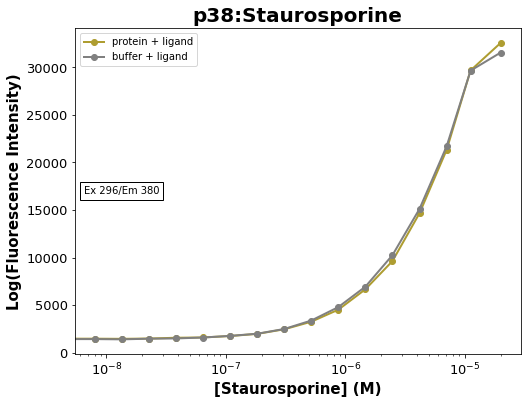

In [37]:
# plot buffer and protein (p38) on same plot for staurosporine at Ex 296/Em 396

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=[8,6])

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[2]

title = 'p38:Staurosporine'

x_values = concentrations

plt.semilogx(x_values, data_396[4,11,:], c=protein_color, linewidth=2, marker='o', label='protein + ligand')
plt.semilogx(x_values, data_396[4,1,:], c='0.5', linewidth=2, marker='o', label='buffer');


plt.legend(['protein + ligand', 'buffer + ligand'], loc='upper left')
plt.title('p38:Staurosporine', fontsize=20, fontweight='bold')
plt.xlabel('[Staurosporine] (M)', fontsize=15, fontweight='bold')
plt.ylabel('Log(Fluorescence Intensity)', fontsize=15, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=13)
    
anchored_text = AnchoredText('Ex 296/Em 380' ,  loc='center left', prop=dict(size=10))
axes.add_artist(anchored_text)
            
fig.savefig('20190426_p38_stauro_396_gain65_rep3.pdf', bbox_inches='tight', dpi=300)